In [ ]:
"""
What? Data scaling
"""

In [22]:
# Import python modules
from numpy import mean
from numpy import std
from numpy import asarray
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

### Example of normalisation

In [ ]:
"""
Normalization is a rescaling of the data from the original range so that all values 
are within the new range of 0 and 1.
The default scale for the MinMaxScaler is to rescale variables into the range [0,1], 
although a preferred scale can be specified via the feature range argument as a tuple
containing the min and the max for all variables.
"""

In [3]:
# define data
data = asarray([[100, 0.001],
       [8, 0.05],
       [50, 0.005],
       [88, 0.07],
       [4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


### Example od standardistion

In [ ]:
"""
Standardizing a dataset involves rescaling the distribution of values so that the mean of observed
values is 0 and the standard deviation is 1
"""

In [6]:
# define data
data = asarray([[100, 0.001],
       [8, 0.05],
       [50, 0.005],
       [88, 0.07],
       [4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


### Diabetes dataser

In [10]:
# load the dataset
dataset = read_csv('../DATASETS/pima-indians-diabetes.csv', header=None) 
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())


(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

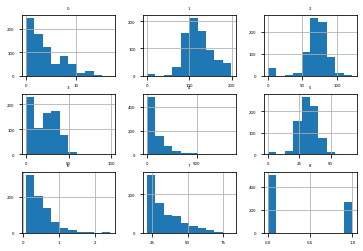

In [11]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### Fit a KNeighborsClassifier with NO scaling

In [16]:
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


### Fit a KNeighborsClassifier using a MinMaxScaler

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.168179    0.204015    0.348958  
std      0.141473    0.196004    0.476951  
min      0.000000    0.000000    0.000000  
25%      0.070773    0.050000    0.000000  
50%   

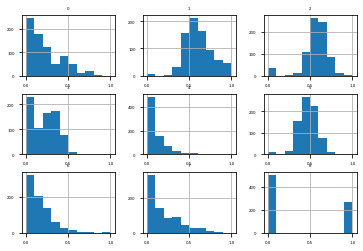

Accuracy: 0.739 (0.053)


In [24]:
# define the pipeline
trans = MinMaxScaler()


data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
 # histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))                       

### Fit a KNeighborsClassifier using StandardScaler

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   1.387779e-17 -4.625929e-18  1.040834e-17  5.204170e-17 -1.619075e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7             8  
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  
mean   1.850372e-17  1.387779e-17 -3.469447e-18  1.850372e-17  
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+0

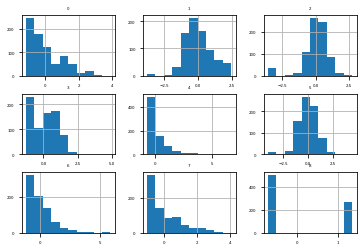

Accuracy: 0.741 (0.050)


In [23]:
# define the pipeline
trans = StandardScaler()


data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
"""
Running the example, we can see that the StandardScaler transform results in a lift in performance 
from 71.7 percent accuracy without the transform to about 74.1 percent with the transform, slightly
higher than the result using the MinMaxScaler that achieved 73.9 percent.
"""